**Group 6 Project Proposal**

By Brady Bracken, Ally Davies, Eric Zhang, Louis Ryu

**Introduction:**
Pokemon is an international video game franchise that has been popular for many years. The creatures found in the Pokemon games, called Pokemon, each have their own unique properties. There are 1032 unique Pokemon across all current games. They have basic definitions such as their Type, stats (HP, Attack, Special Attack, Defense, Special Defense, Speed), and whether or not they are a final evolution. 

We want to use classification to predict whether a pokemon is a final evolution or not using BST (Base Stat Total). 

In [15]:
### Run this cell before continuing. 
library(repr)
library(tidyverse)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

**Section 1: Preliminary exploratory data analysis:**

Below, we have read our Pokemon dataset (Source: https://www.kaggle.com/datasets/maca11/all-pokemon-dataset/data) into R, selecting only the columns we deem important. 

Those being,

- Name: Name of the Pokemon
- Type 1: The Pokemon's Primary type (we won't include secondary types in this)
- HP: The Pokemon's Base HP (Hit Points)
- Att: The Pokemon's Base Attack
- Def: The Pokemon's base defense
- Spa: The Pokemon's Base special attack
- Spd: The Pokemon's Base special defense
- Spe: The Pokemon's Base speed
- BST: The Total of the above 6 values, or Base Stat Total
- Mean: The average of all Base Stats
- Standard Deviation: Standard deviation of all base stats
- Generation: Generation it was introduced
- Final Evolution: 1 = Pokemon is a final evolution
                 0 = Pokemon is not a final Evolution
- Catch Rate: The catch rate, the higher the number, the harder it is to catch with a Poke Ball.
- Legendary: 1 = Pokemon is a Legendary
           0 = Pokemon is not a Legendary
- Mega Evolution: 1 = Pokemon is a Mega Evolution
                0 = Pokemon is not a Mega Evolution
- Height: The Pokemon's height
- Weight: The Pokemon's weight
- BMI: The Pokemon's BMI

In [16]:
## Run this cell to view the data, using only the variables listed above.
## We may not use all of this data, however we have listed all variables that may be useful.
## Table is ordered by the Pokemon's order of appearance (eg. Pokedex number)
pokemon_data <- read_csv("data/All_Pokemon.csv")
pokemon_data_selected <- select(pokemon_data, Name, `Type 1`, HP, Att, Def, Spa, Spd, Spe, BST, Mean,  `Standard Deviation`,
                                Generation, `Final Evolution`,  `Catch Rate`, Legendary, `Mega Evolution`, Height, Weight, BMI)
pokemon_data_selected
## Note: All data is already scaled and cleaned.

Rows: 1032 Columns: 44
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Name, Type 1, Type 2, Abilities, Experience type
dbl (39): Number, HP, Att, Def, Spa, Spd, Spe, BST, Mean, Standard Deviation...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Type 1,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Final Evolution,Catch Rate,Legendary,Mega Evolution,Height,Weight,BMI
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bulbasaur,Grass,45,49,49,65,65,45,318,53.0,8.640988,1,0,45,0,0,0.7,6.9,14.1
Ivysaur,Grass,60,62,63,80,80,60,405,67.5,8.902247,1,0,45,0,0,1.0,13.0,13.0
Venusaur,Grass,80,82,83,100,100,80,525,87.5,8.902247,1,1,45,0,0,2.0,100.0,25.0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Calyrex,Psychic,100,80,80,80,80,80,500,83.33333,7.45356,8,1,3,1,0,1.1,7.7,6.4
Calyrex Ice Rider,Psychic,100,165,150,85,130,50,680,113.33333,39.33475,8,1,3,1,0,2.4,809.1,140.5
Calyrex Shadow Rider,Psychic,100,85,80,165,100,150,680,113.33333,32.36081,8,1,3,1,0,2.4,53.6,9.3


**Table Analysis**

Below, we will summarize the average BST for each Pokemon Type. We will do so with all pokemon (Table 1), and only pokemon who are a final evolution (Table 2).

In [17]:
## First dataset is taking the average BST per Type.
bst_data <- pokemon_data_selected |>
            group_by(`Type 1`) |>
            summarize(BST_avg = mean(BST))
bst_data

## Second dataset is taking the average BST per Type, but only for a final evolution.
bst_data_final <- pokemon_data_selected |>
            filter(`Final Evolution` == 1) |>
             group_by(`Type 1`) |>
            summarize(BST_avg = mean(BST))
bst_data_final

Type 1,BST_avg
<chr>,<dbl>
Bug,384.6173
Dark,434.5435
Dragon,539.7857
⋮,⋮
Rock,451.5424
Steel,482.0278
Water,430.4809


Type 1,BST_avg
<chr>,<dbl>
Bug,473.7857
Dark,512.7407
Dragon,629.9643
⋮,⋮
Rock,531.6333
Steel,549.0909
Water,511.8219


When observing the tables above, we can clearly see that the BST average is much higher among Pokemon that are the Final Evolution compared to pokemon on average.

**Plot Analysis**

To further prove that a Pokemon's BST is much higher for a Final Evolution compared to a Pokemon that is not a Final Evolution, the scatter plot below will plot the relationship between Attack and BST for all Pokemon (the Attack Stat isn't relevant here, any Base Stat would work for this graph), coloring Pokemon that are a final evolution in blue and a pokemon that is not a final evolution black.

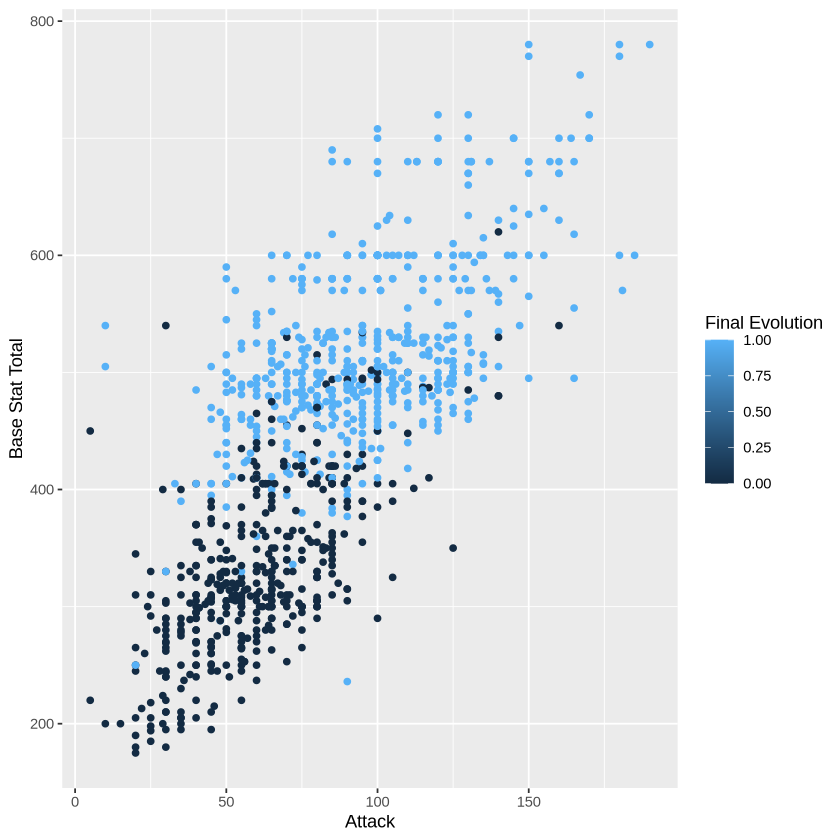

In [18]:
## this scatterplot will plot a Pokemon's Attack on the x-axis and the BST on the y-axis, 
## coloring Final Evolutions as blue and not Final Evolutions as black.
capture_data <- pokemon_data |>
    ggplot(aes(x = Att, y = BST, color = `Final Evolution`)) +
    geom_point() +
    labs(x= "Attack", y = "Base Stat Total")
capture_data

Observing the plot above, we can clearly see that Pokemon who are a final evolution have a significant increase in BST compared to Pokemon who aren't the final evolution.

**Section 2: Methods**

We plan to use classification to predict whether a Pokemon is a final evolution or not using k-nearest-neighbors. We will use BST and Attack (any base stat would work for this prediction) as our predictive variables.

(insert one way we would visualize the results)

**Section 3: Outcomes and Significance**

(insert what do you expect to find)

(insert 